In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
pd.options.display.max_rows = 6000
import keras

X = pd.read_csv('data_with_weather_wo_outliers.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)
X_train, X_test  = train_test_split(X, test_size=0.2, shuffle=False)
print(X_train['total_demand'].mean(), 'train')
print(X_test['total_demand'].mean(), 'test')

y_train = X_train['total_demand'].to_numpy().reshape(-1, 1)
y_test = X_test['total_demand'].to_numpy().reshape(-1, 1)

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train).flatten().tolist()
y_test = scaler.transform(y_test).flatten().tolist()
SEQUENCE_SIZE = 500
PREDICTION_SIZE = 50

def to_sequences(seq_size, obs, after_window_length):
    x = []
    y = []
    for i in range(0, len(obs) - seq_size - after_window_length + 1, SEQUENCE_SIZE):
        window = obs[i:(i + seq_size)]
        after_window = obs[i + seq_size: i + seq_size + after_window_length]
        x.append(window)
        y.append(after_window)
    return np.array(x), np.array(y)

X_train, y_train = to_sequences(SEQUENCE_SIZE, y_train, 50)
X_test, y_test = to_sequences(SEQUENCE_SIZE, y_test, 50)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

256.10585208265206 train
231.52173122197206 test


In [6]:
model = Sequential()
model.add(Conv1D(16, (3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(32, (3), activation='relu'))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(15, (3)))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
optimizer = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['mape', 'mse', 'mae'])

c:\Users\Valer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 498, 16)        │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 496, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 494, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 160, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,114 (172.32 KB)

 Trainable params: 44,114 (172.32 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X_train['total_demand'].mean()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.9976 - mae: 0.8281 - mape: 100.8206 - mse: 0.9976 - val_loss: 0.8650 - val_mae: 0.8239 - val_mape: 100.9360 - val_mse: 0.8650
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 867ms/step - loss: 0.9848 - mae: 0.8239 - mape: 100.2923 - mse: 0.9848 - val_loss: 0.8567 - val_mae: 0.8198 - val_mape: 100.8536 - val_mse: 0.8567
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 929ms/step - loss: 0.9730 - mae: 0.8182 - mape: 99.9512 - mse: 0.9730 - val_loss: 0.8463 - val_mae: 0.8147 - val_mape: 100.9997 - val_mse: 0.8463
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 900ms/step - loss: 0.9518 - mae: 0.8095 - mape: 99.8759 - mse: 0.9518 - val_loss: 0.8314 - val_mae: 0.8072 - val_mape: 101.7734 - val_mse: 0.8314
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - loss: 0.9471 - mae: 0.8060 - mape: 99.9342 - mse: 0.9471 - val_loss: 0.8092 - val_mae: 0.7960 - val_mape: 103.4765 - val_mse: 0.8092
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 768ms/step - loss: 0.9088 - ma

KeyboardInterrupt: 

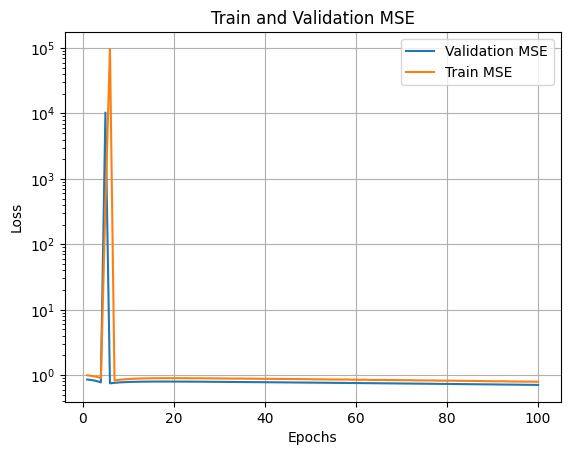

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation MSE')
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Train and Validation MSE')
plt.legend()
plt.grid()
plt.show()

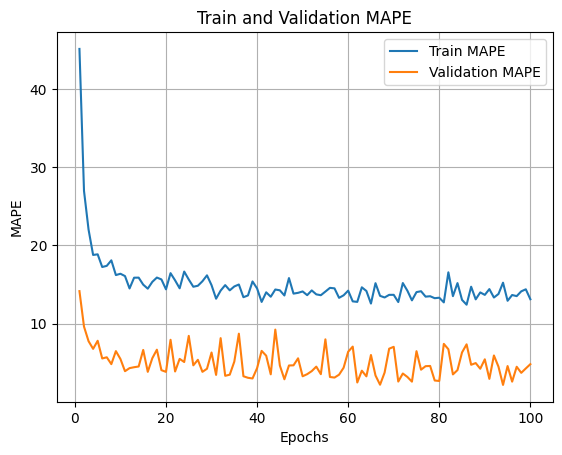

In [6]:
train_loss = history.history['mape']
val_loss = history.history['val_mape']
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train MAPE')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation MAPE')
plt.legend()
plt.grid()
plt.show()

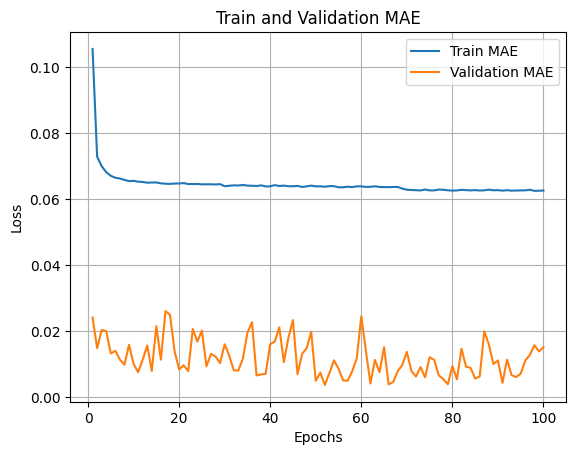

In [21]:
train_loss = history.history['mae']
val_loss = history.history['val_mae']
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train MAE')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation MAE')
plt.legend()
plt.grid()
plt.show()

In [100]:
trainPredict = model.predict(X_train).reshape(y_train.shape)
testPredict = model.predict(X_test).reshape(y_test.shape)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [9]:
training_mae = mean_absolute_error(y_train, trainPredict)
test_mae = mean_absolute_error(y_test, testPredict)
print("Training MAE:", round(training_mae, 5))
print("Test MAE:", round(test_mae, 5))

training_mape = mean_absolute_percentage_error(y_train, trainPredict)
test_mape = mean_absolute_percentage_error(y_test, testPredict)
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 4) *100} %")

Training MAE: 0.01499
Test MAE: 0.01507


Training MAPE: 4.78 %
Test MAPE: 4.83 %


In [10]:
training_mse = mean_squared_error(y_train, trainPredict)
test_mse = mean_squared_error(y_test, testPredict)
print(f"\n\nTraining MSE: {round(training_mse, 4)}")
print(f"Test MSE: {round(test_mse, 4)}")



Training MSE: 0.0004
Test MSE: 0.0003


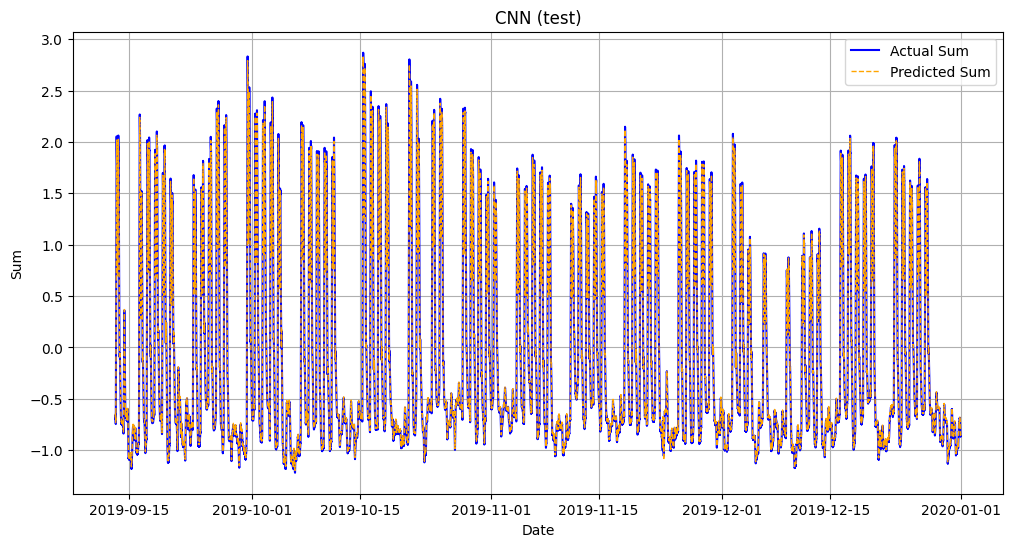

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(X[len(y_train)+120:].index, y_test, color='blue', label='Actual Sum')
plt.plot(X[len(y_train)+120:].index, testPredict, color='orange', linewidth=1, label='Predicted Sum', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('CNN (test)')
plt.grid()
plt.legend()
plt.show()

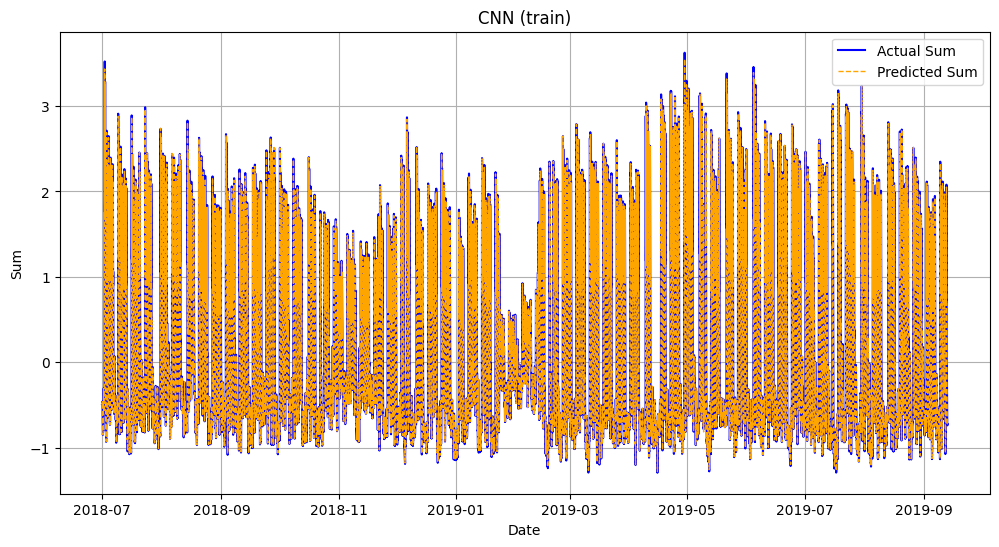

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X[:len(y_train)].index, y_train, color='blue', label='Actual Sum')
plt.plot(X[:len(y_train)].index, trainPredict, color='orange', linewidth=1, label='Predicted Sum', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('CNN (train)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
np.save('cnn_lstm.npy', history.history)

In [ ]:
X[:len(y_train)+120].shape

(632508, 79)

In [101]:
trainPredict = np.array(trainPredict).reshape(-1, 1)
# Inverse transform y_pred to get the original values
y_pred_original = scaler.inverse_transform(trainPredict).flatten().tolist()
y_train_original = scaler.inverse_transform(np.array(y_train).reshape(-1, 1)).flatten().tolist()
np.array(abs(np.array(y_train_original)-np.array(y_pred_original))).mean()

123.09849663197573

In [102]:
testPredict = np.array(testPredict).reshape(-1, 1)
# Inverse transform y_pred to get the original values
y_pred_original = scaler.inverse_transform(testPredict).flatten().tolist()
y_test_original = scaler.inverse_transform(np.array(y_test).reshape(-1, 1)).flatten().tolist()
np.array(abs(np.array(y_test_original)-np.array(y_pred_original))).mean()

124.28401850749347